# Telco Customer Churn Prediction

## Objective
This project aims to analyze customer churn behavior in a telecommunications company and build predictive models to identify customers likely to churn.

## Goals
- Explore the dataset and understand the patterns behind customer churn
- Perform data cleaning and feature engineering
- Build classification models to predict churn
- Evaluate model performance and interpret the results
- Derive actionable insights to help reduce churn

## Tools & Libraries
- Python, Pandas, NumPy
- Matplotlib, Seaborn
- sklearn, imblearn

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Data Loading 

In [2]:
tel_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
tel_data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
0              29.85        29.85    No  
1              56.95       1889.5    No  
2              53.85       108.15   Yes  
3              42.30      1840.75    No  
4              70.70       151.65   Yes  
...              ...          ...   ...  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No  

[7043 rows x 21 columns]

In [6]:
# 'tenure' is for how long citizen have been the part of the company eg. 1 month,2 month etc

In [5]:
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
tel_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
tel_data.duplicated().sum()

0

In [8]:
for i in tel_data.columns:
    print(i)
    print(tel_data[i].unique())
    print('*'*30)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
******************************
gender
['Female' 'Male']
******************************
SeniorCitizen
[0 1]
******************************
Partner
['Yes' 'No']
******************************
Dependents
['No' 'Yes']
******************************
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
******************************
PhoneService
['No' 'Yes']
******************************
MultipleLines
['No phone service' 'No' 'Yes']
******************************
InternetService
['DSL' 'Fiber optic' 'No']
******************************
OnlineSecurity
['No' 'Yes' 'No internet service']
******************************
OnlineBackup
['Yes' 'No' 'No internet service']
******************************
DeviceProtection
['No' 'Yes' 

##### Initail Observations 

- There is no null value or duplicated value.
- Total Charges should be a categorical column.
- The target variable is 'Churn' (Yes/No)

### 1. Data Cleaning 

In [9]:
# Creating a copy of our data for manupulation & processing

In [10]:
data = tel_data.copy()

In [11]:
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
0              29.85        29.85    No  
1              56.95       1889.5    No  
2              53.85       108.15   Yes  
3              42.30      1840.75    No  
4              70.70       151.65   Yes  
...              ...          ...   ...  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No  

[7043 rows x 21 columns]

 > 1.1 Converting 'TotalCharges' to numeric data type

In [13]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [14]:
data['TotalCharges'].isnull().sum()

11

In [15]:
# After converting the data type of 'TotalCharges' some null values is introduced.

In [16]:
data[data['TotalCharges'].isnull()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85       

> 1.2 Missing value imputation  

In [17]:
100 * data['TotalCharges'].isnull().sum()/(len(data))

0.15618344455487718

> 1.3  As the number of missing values is very less, 0.15% of the total data we can drop them.

In [18]:
data.dropna(inplace = True)

### 2. Data Transformation 

In [19]:
for i in data.columns:
    print(data[i].value_counts())
    print('*'*30)

customerID
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64
******************************
gender
Male      3549
Female    3483
Name: count, dtype: int64
******************************
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64
******************************
Partner
No     3639
Yes    3393
Name: count, dtype: int64
******************************
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
******************************
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64
******************************
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
******************************
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: c

> 2.1 The 'tenure' column contains a wide range of values for category, so will group it into bins to simplify analysis.

In [20]:
data['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7032, dtype: int64

> 2.2 Understanding the distribution of 'tenure' column by plotting a line plot.

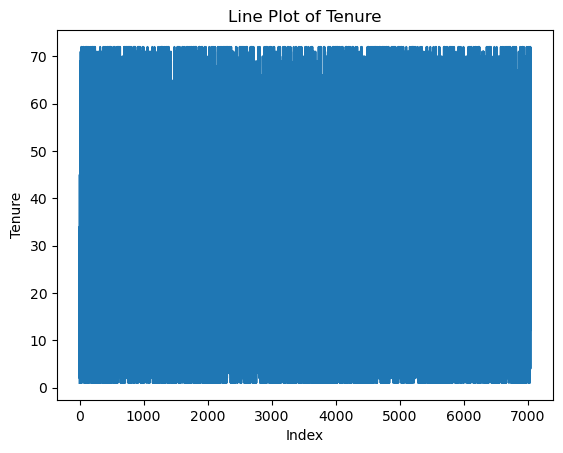

In [21]:
data['tenure'].plot(kind='line')
plt.title('Line Plot of Tenure')
plt.xlabel('Index')
plt.ylabel('Tenure')
plt.show()

> 2.3 Getting the range of 'tenure' column befor creating bins

In [22]:
print(f'Max of tenure is {data.tenure.max()}')
print(f'Min of tenure is {data.tenure.min()}')

Max of tenure is 72
Min of tenure is 1


In [8]:
# Making bins with bin size of 10 

In [23]:
def asign_tenure(i):
    if pd.isna(i):
        return 'None'
    elif 1 <= i < 10:
        return '1-10'
    elif 10<= i < 20:
        return '10-20'
    elif 20<= i < 30:
        return '20-30'
    elif 30<= i < 40:
        return '30-40'
    elif 40<= i < 50:
        return '40-50'
    elif 50<= i < 60:
        return '50-60'
    elif 60<= i < 70:
        return '60-70'
    elif i>=70:
        return '70+'
    else:
        return 'wrong data'
    

> 2.4 Creating a new column 'tenure_period' by creating bins using 'tenure' column.

In [24]:
data['tenure_period'] = data['tenure'].apply(asign_tenure)

In [25]:
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges Churn tenure_period  
0              29.85         29.85    No          1-10  
1              56.95       1889.50    No         30-40  
2              53.85        108.15   Yes          1-10  
3              42.30       1840.75    No         40-50  
4              70.70        151.65   Yes          1-10  
...              ...           ...   ...           ...  
7038           84.80       1990.50    No         20-30  
7039          103.20       7362.90    No           70+  
7040           29.60        346.45    No         10-20  


In [26]:
data['tenure_period'].value_counts()

tenure_period
1-10     1843
10-20     953
60-70     832
20-30     762
50-60     690
30-40     653
70+       651
40-50     648
Name: count, dtype: int64

> 2.5
- As tenure column is no longer needed we can drop it.
- CustomerID is also not giving any significant information so we can drop it.

In [27]:
data.drop(columns = ['tenure','customerID'], inplace = True)

In [28]:
data

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0     Female              0     Yes         No           No  No phone service   
1       Male              0      No         No          Yes                No   
2       Male              0      No         No          Yes                No   
3       Male              0      No         No           No  No phone service   
4     Female              0      No         No          Yes                No   
...      ...            ...     ...        ...          ...               ...   
7038    Male              0     Yes        Yes          Yes               Yes   
7039  Female              0     Yes        Yes          Yes               Yes   
7040  Female              0     Yes        Yes           No  No phone service   
7041    Male              1     Yes         No          Yes               Yes   
7042    Male              0      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  \
0              Electronic check           29.85         29.85    No   
1                  Mailed check           56.95       1889.50    No   
2                  Mailed check           53.85        108.15   Yes   
3     Bank transfer (automatic)           42.30       1840.75    No   
4              Electronic check           70.70        151.65   Yes   
...                         ...             ...           ...   ...   
7038               Mailed check           84.80       1990.50    No   
7039    Credit card (automatic)          103.20       7362.90    No   
7040           Electronic check           29.60        346.45    No   
7041               Mailed check           74.40        306.60   Yes   
7042  Bank transfer (automatic)          105.65       6844.50    No   

     tenure_period  
0             1-10  
1            30-40  
2             1-10  
3            40-50  
4             1-10  
...            ...  
7038         20-30  
7039           70+  
7040         10-20  
7041          1-10  
7042         60-70  

[7032 rows x 20 columns]

### 3. Univariate analysis

> 3.1 Visualizing the categorical columns for better analysis.

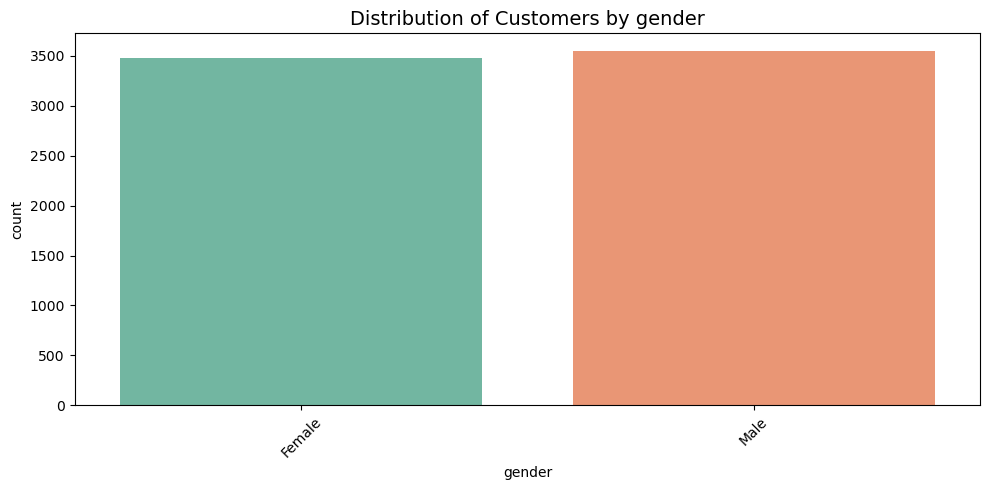

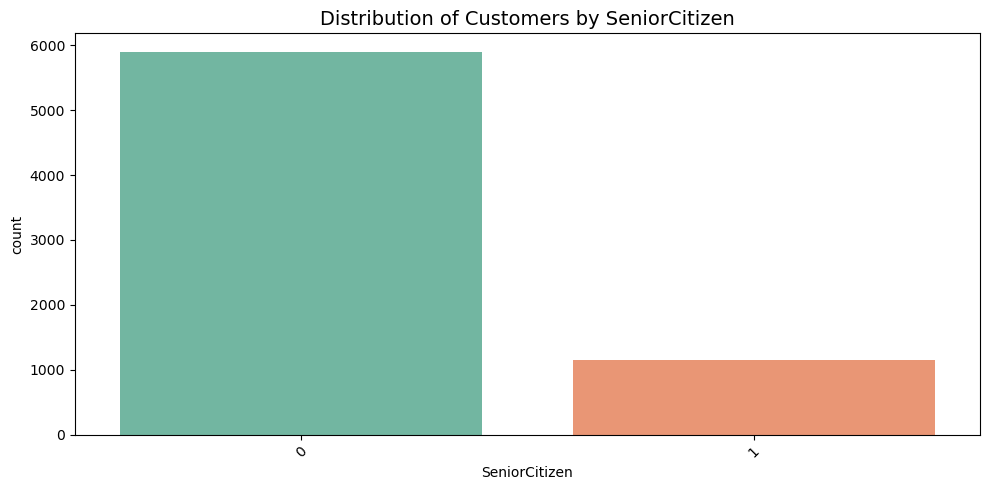

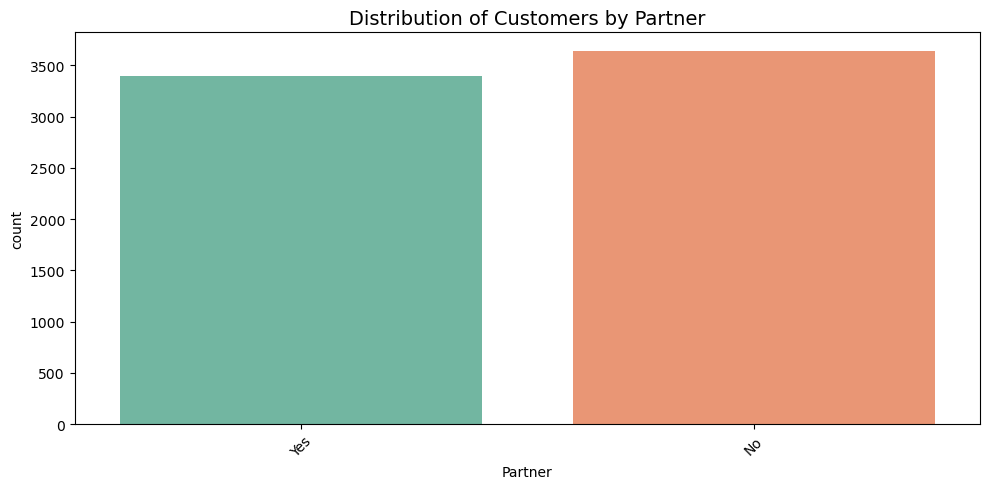

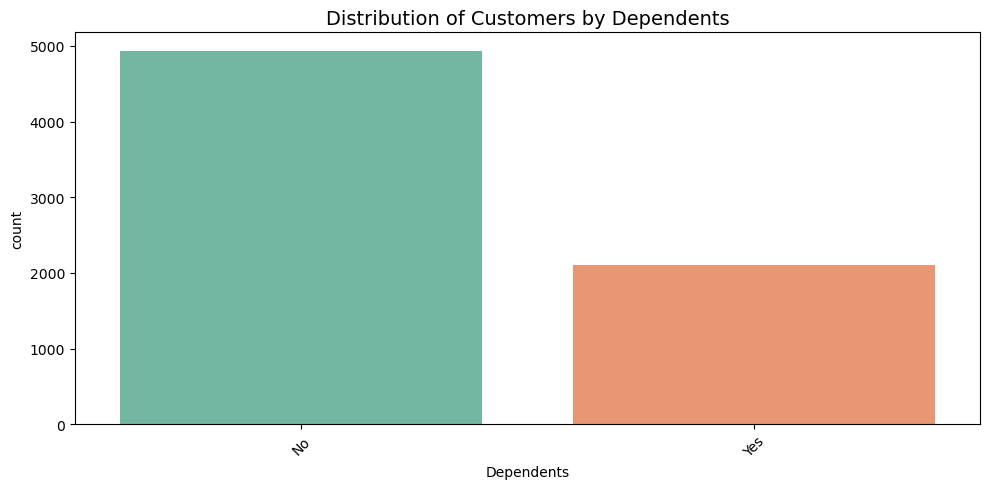

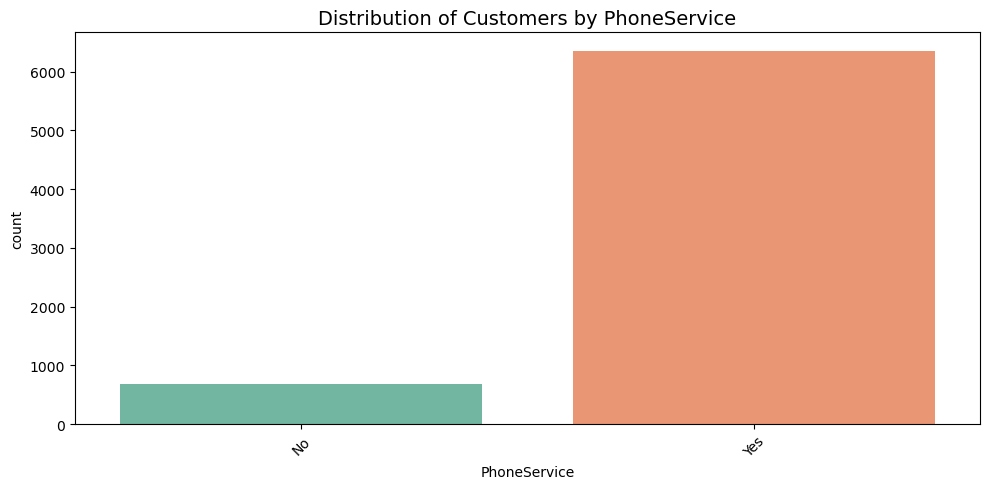

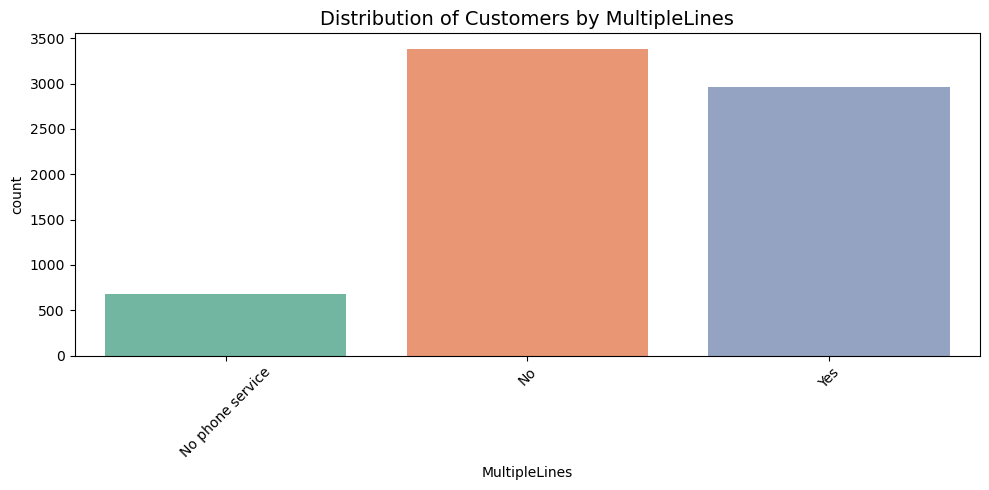

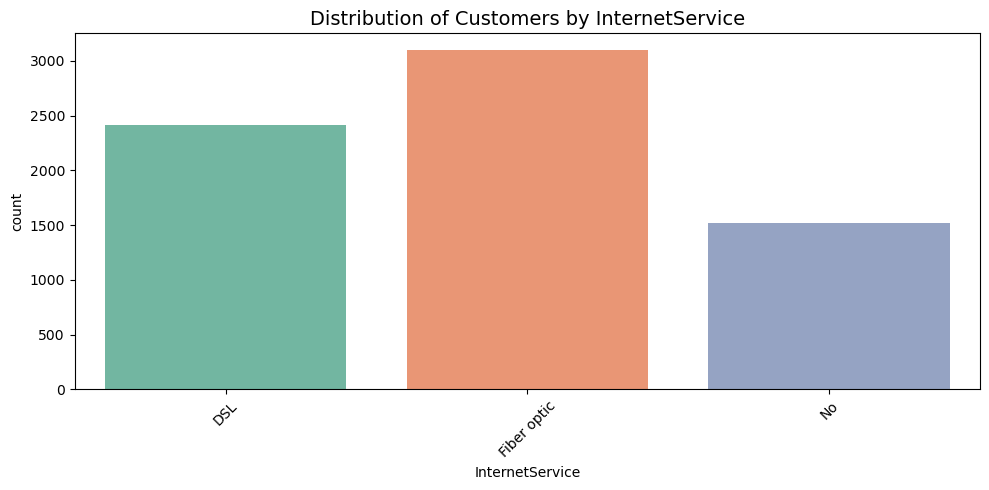

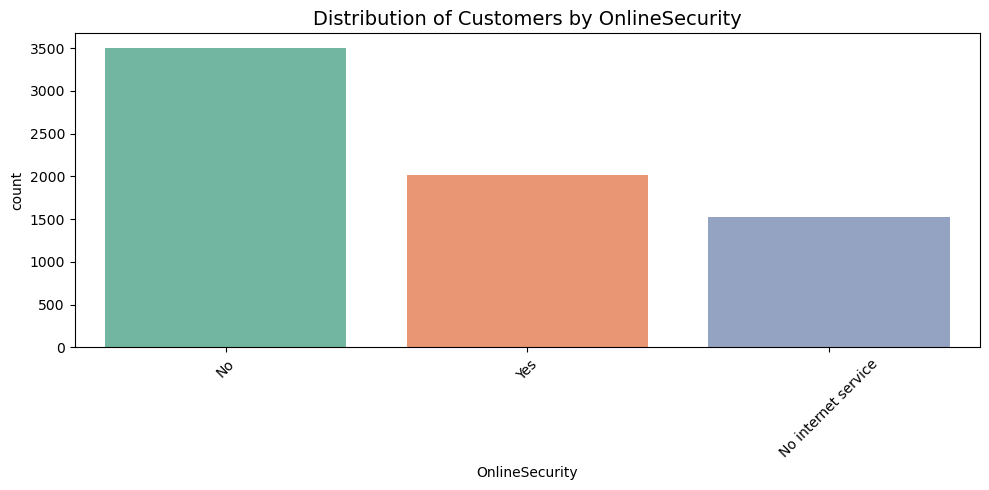

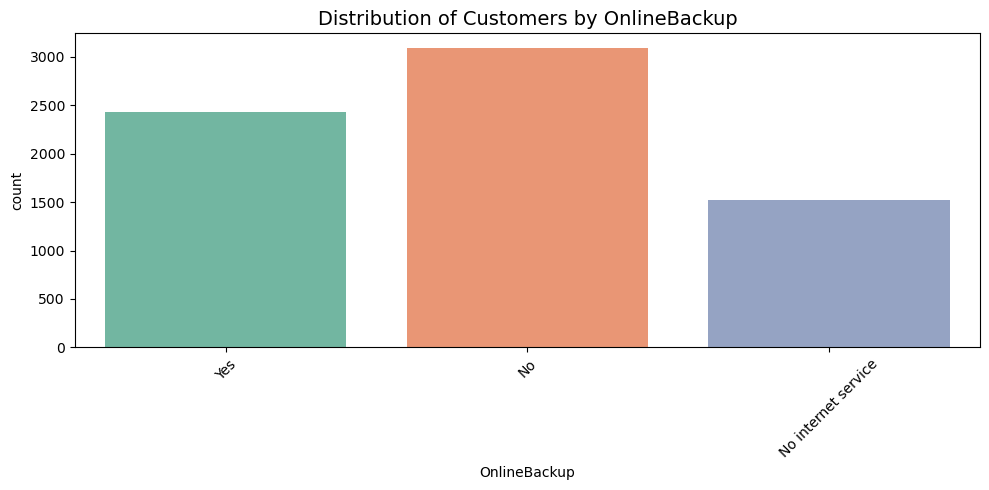

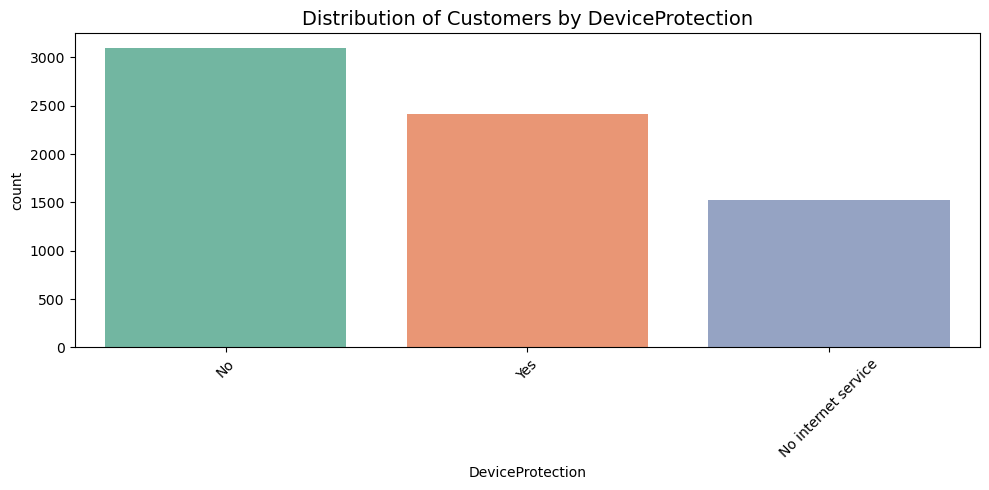

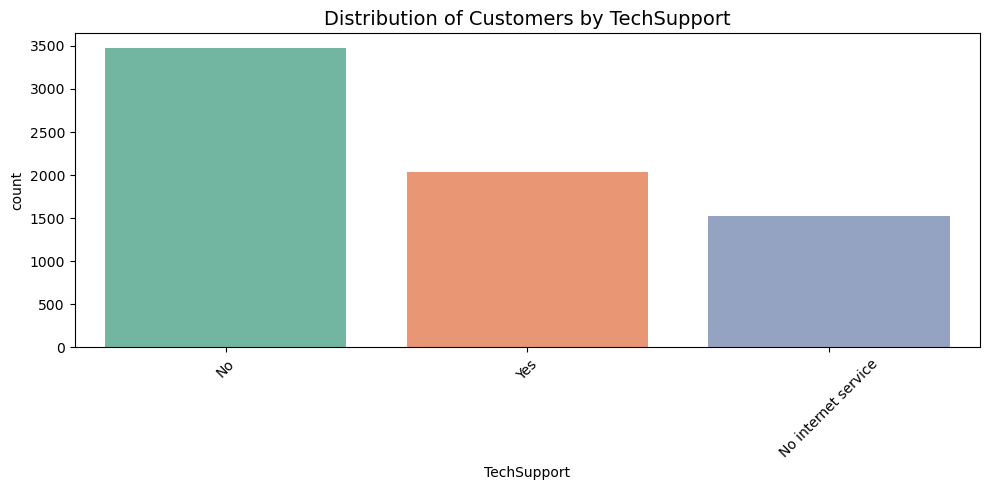

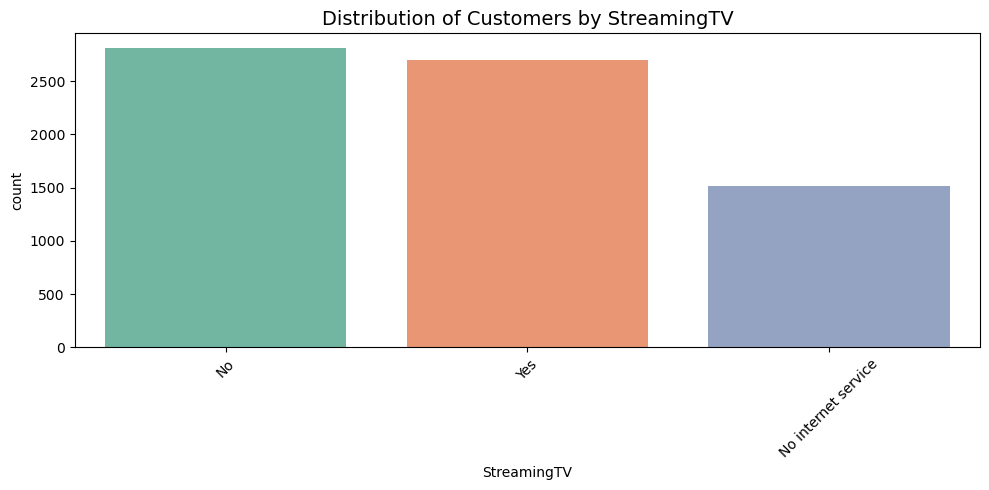

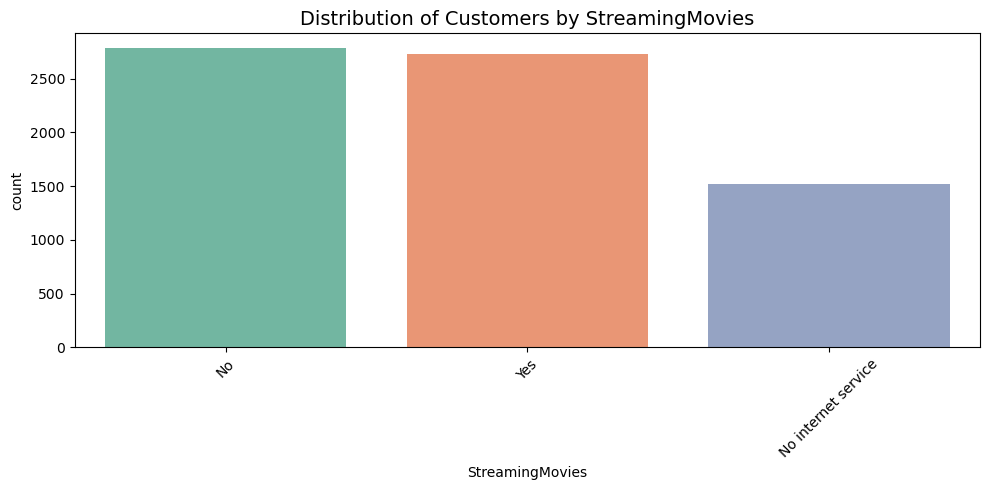

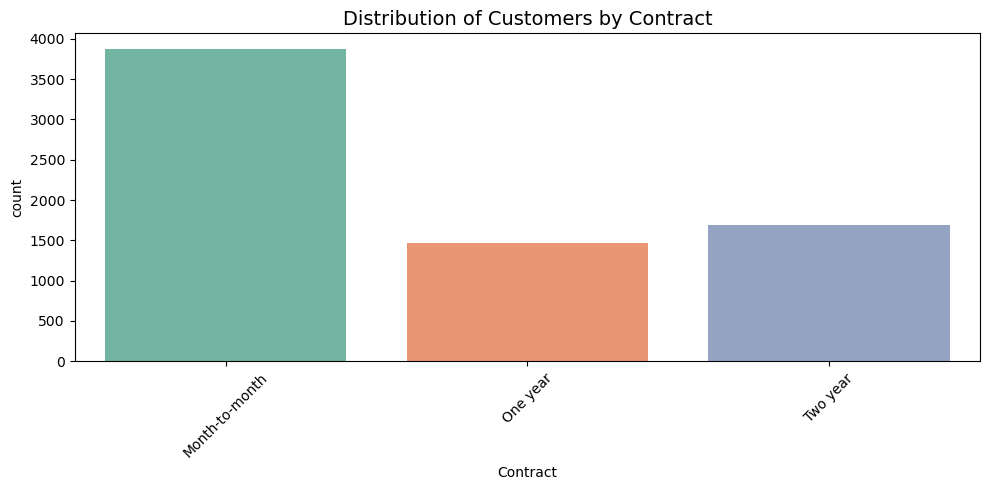

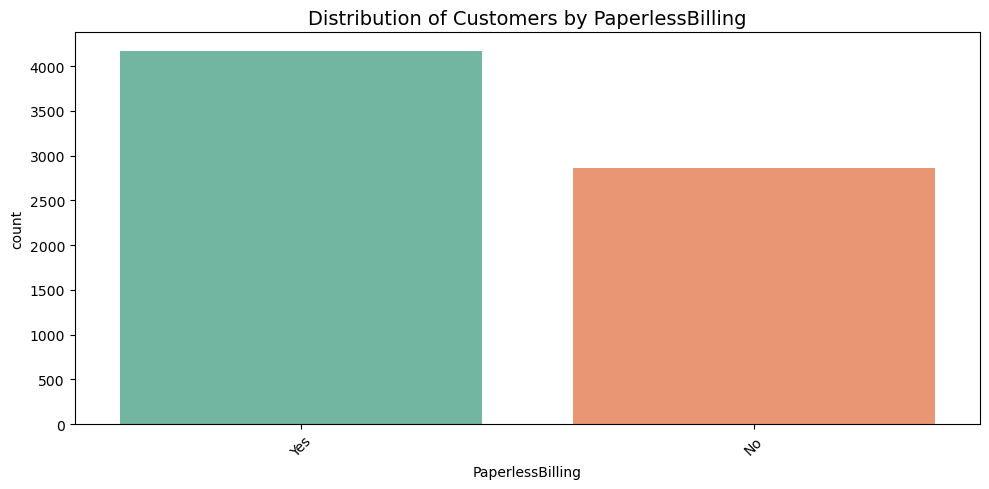

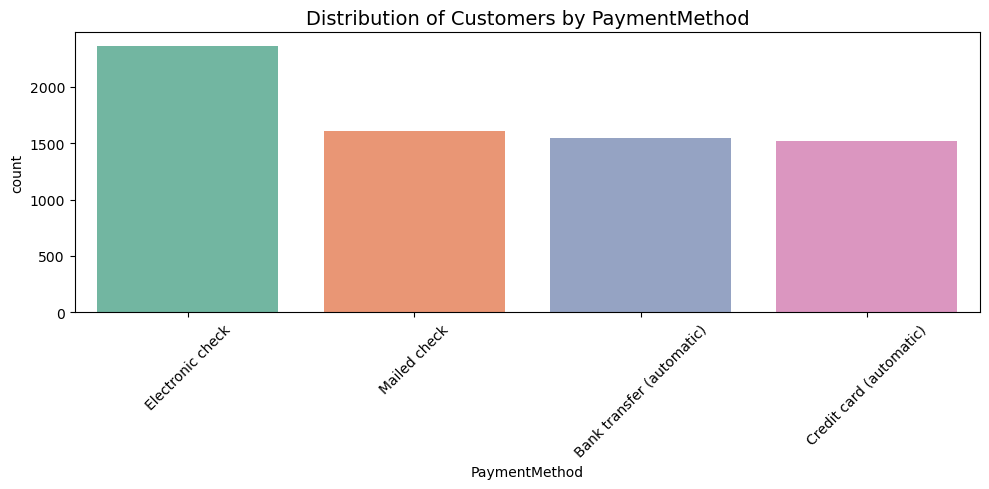

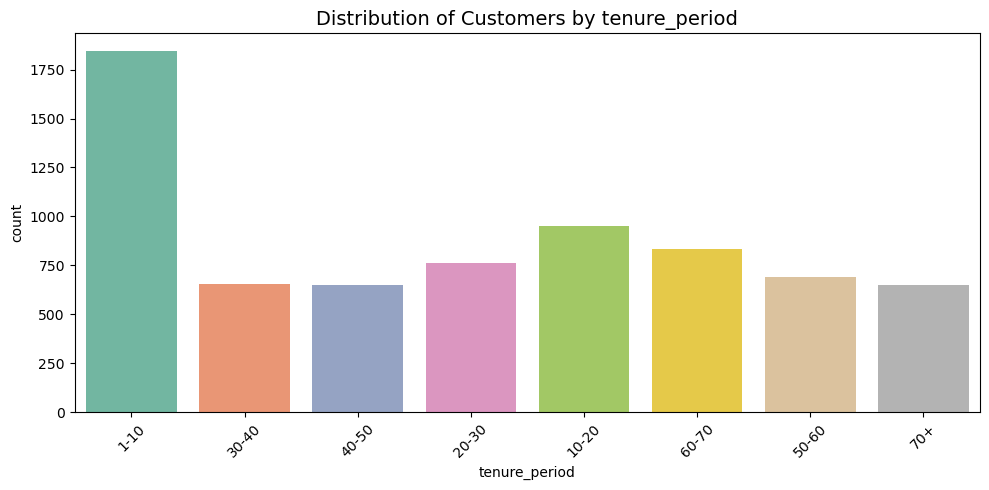

In [30]:
categorical_cols = data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']).columns
for cols_name in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=cols_name, palette='Set2')
    plt.title(f'Distribution of Customers by {cols_name}', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### Key observations: 
- The customer base has a limited number of senior citizens. 
- Majority of customers subscribe to phone services, with a notable portion having multiple lines.
- Fiber optics is the preferred choice among customers for their internet needs.
- Not many customers have opted for additional security measures such as online security, online backup, device protection, and tech support.
- Most customers prefer month-to-month contracts over long-term commitments.
- There is a strong inclination towards paperless billing among customers.
- Electronic checks are a popular payment method among customers.
- The majority of customers have a tenure of 1-10 months.


> 3.2 Analyzing numerial columns

In [32]:
data['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

> 3.3 Using boxplots to see the monthly charge distribution.

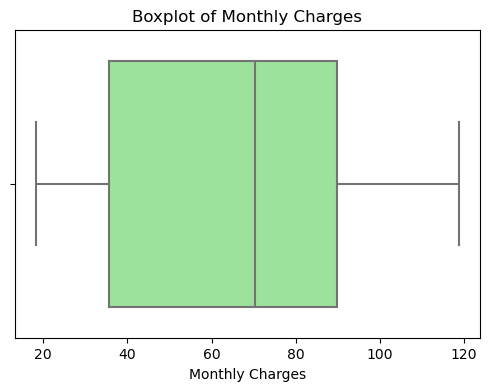

In [34]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['MonthlyCharges'], color='lightgreen')
plt.title('Boxplot of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.show()

> 3.4 Using KDE to check the probability distribution of Total Charge.

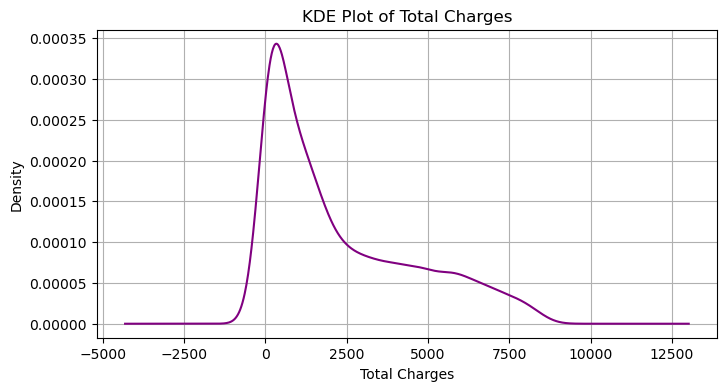

In [36]:
plt.figure(figsize=(8, 4))
data['TotalCharges'].plot(kind='kde', color='purple')
plt.title('KDE Plot of Total Charges')
plt.xlabel('Total Charges')
plt.grid(True)
plt.show()

>3.5 5-minute summary of the numerical columns

In [38]:
data.describe()

SeniorCitizen  MonthlyCharges  TotalCharges
count    7032.000000     7032.000000   7032.000000
mean        0.162400       64.798208   2283.300441
std         0.368844       30.085974   2266.771362
min         0.000000       18.250000     18.800000
25%         0.000000       35.587500    401.450000
50%         0.000000       70.350000   1397.475000
75%         0.000000       89.862500   3794.737500
max         1.000000      118.750000   8684.800000

In [39]:
# SeniorCitizen is a categorical column, so we can ignore its summary.
# The average MonthlyCharges is USD 64.79, and a significant portion pays more than USD 35.58.

##### Key points

- Majority of customers are non-senior citizens and do not have dependents, indicating a younger, possibly more mobile customer base.

- hone service is widely used, while Tech Support is underutilized.

- Fiber optic internet is preferred over DSL, suggesting a demand for faster services.

- Most customers are on month-to-month contracts, with very few opting for yearly plans.

- Electronic checks are the most common payment method.

- Tenure is short for most customers (1–10 months), suggesting early churn risk.

- The average MonthlyCharges is USD 64.79, and a significant portion pays more than USD 35.58.



### 4. Bivariate analysis 

> 4.1 Data Visualization

In [2]:
# Following plots shows the proportion of customers who have churned versus those who have not on basis of various variables.

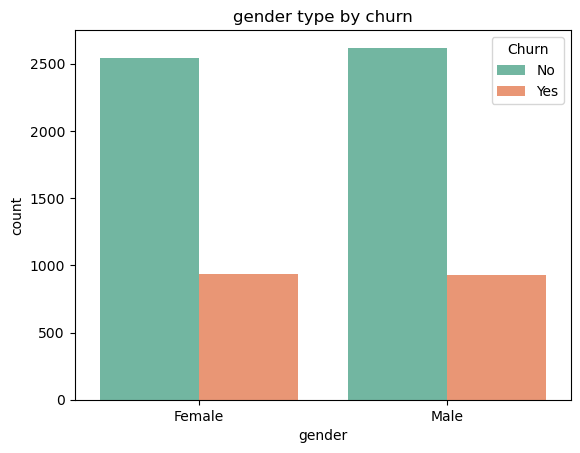

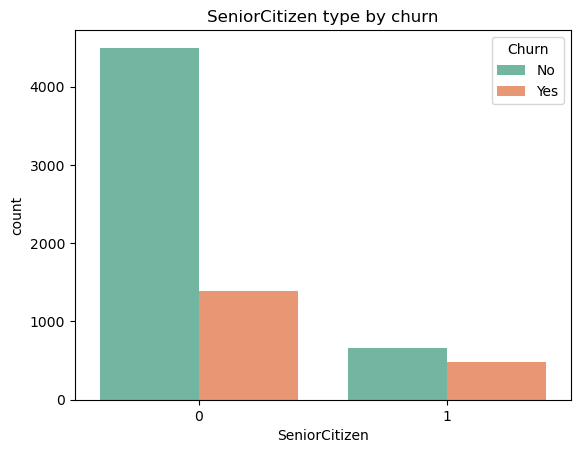

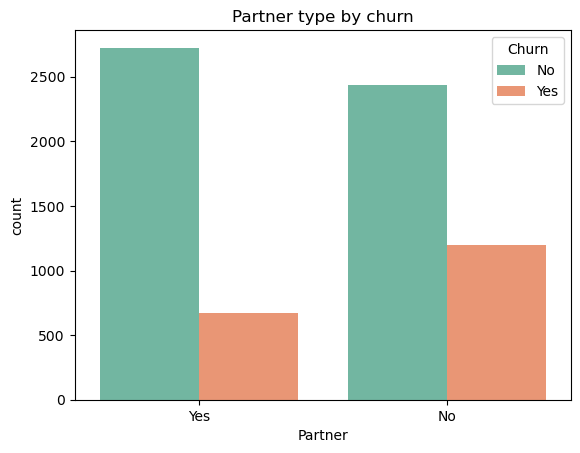

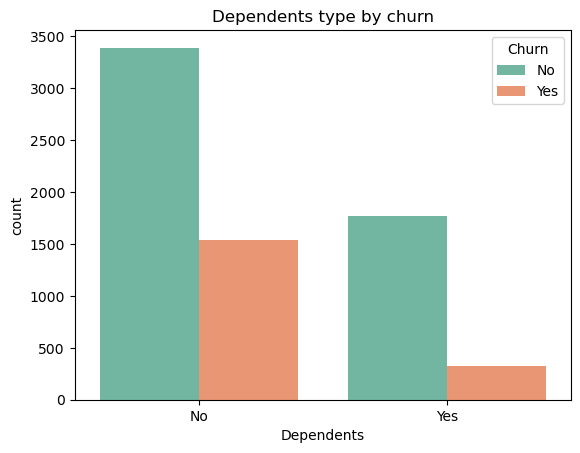

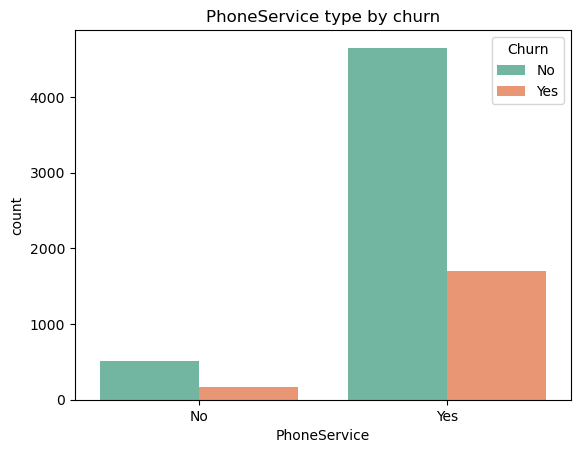

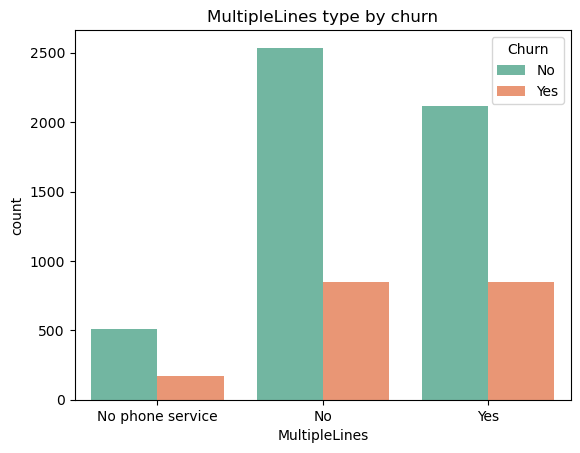

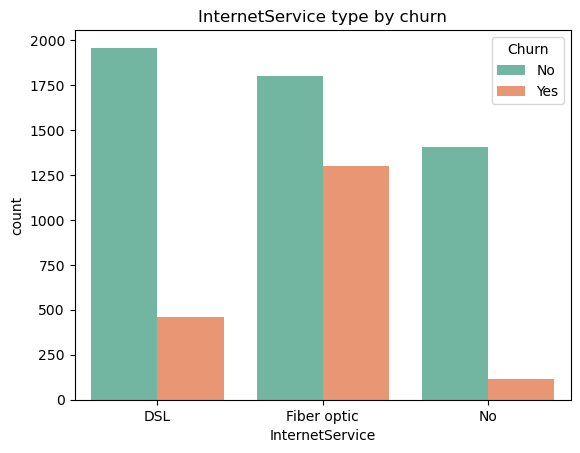

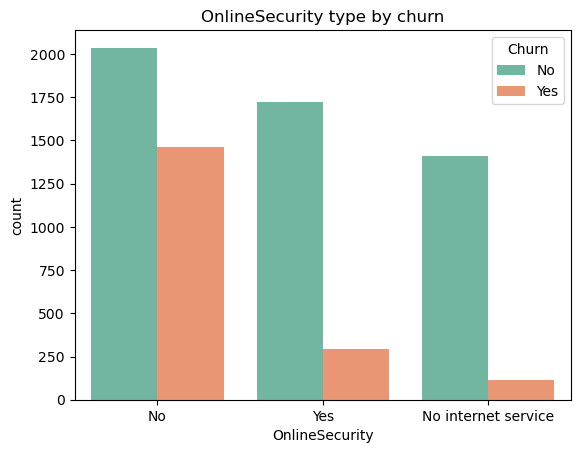

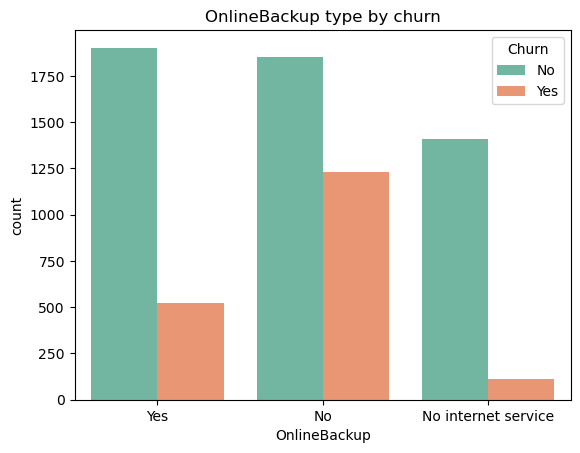

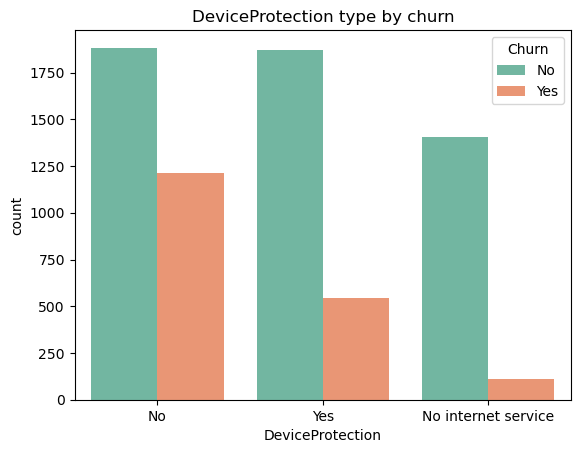

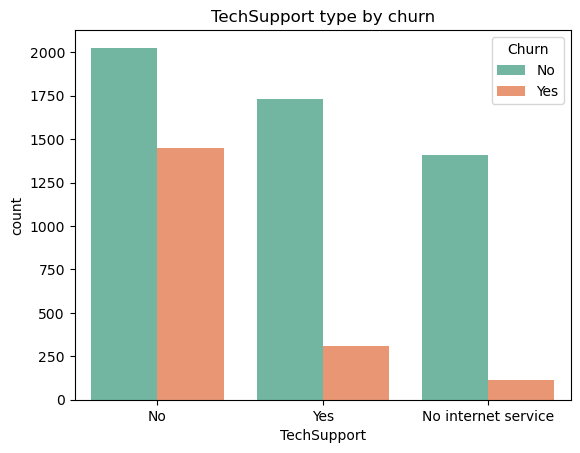

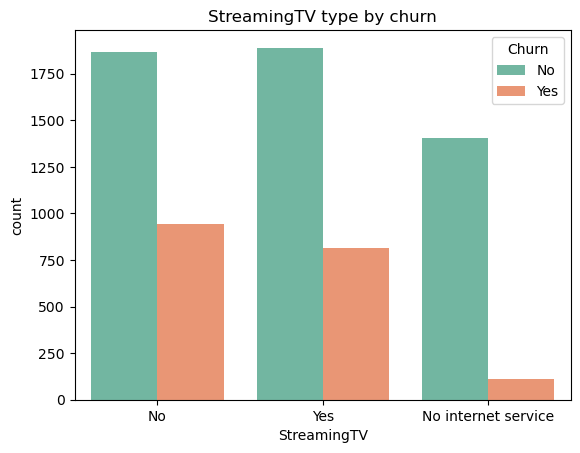

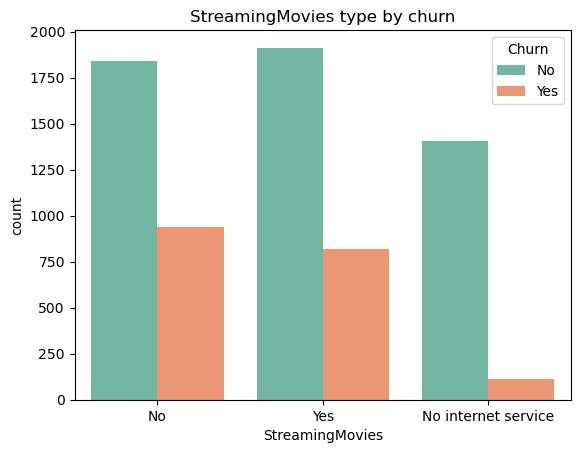

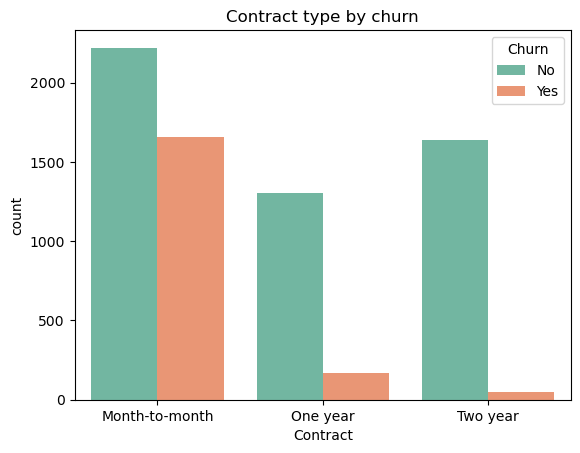

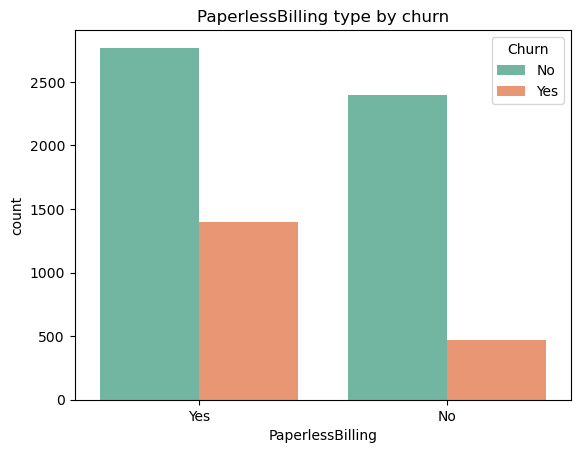

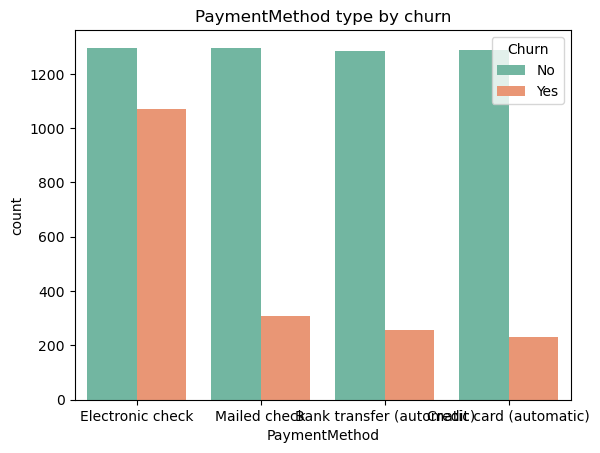

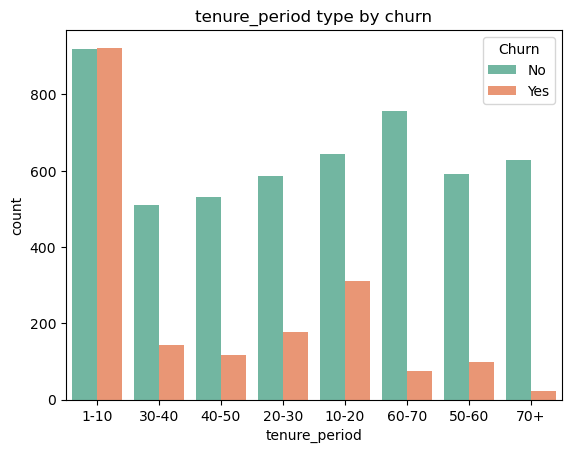

In [40]:
for i in data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']):
    sns.countplot(x= i, hue='Churn', data=data, palette='Set2')
    plt.title(f'{i} type by churn')
    plt.show()


##### Key poits

- Gender has no significant impact on churn.

- Senior citizens churn more frequently.

- Customers with phone services churn less, possibly due to bundled benefits or long-term commitment.

- Fiber optic users churn more than DSL or those with no internet — possibly due to service issues or higher costs.

- Lack of Online Security, Online Backup, and Device Protection are strongly linked with higher churn.

- Tech Support usage reduces churn — suggesting it builds customer satisfaction and trust.

- Month-to-month contracts lead to much higher churn than longer-term contracts.

- Customers using electronic checks have the highest churn — possibly due to payment friction or lack of automation.

- Short-tenure customers (1–10 months) churn significantly more than long-term ones — confirming early disengagement.

### 5. Multivaraite analysis

> 5.1 Data Visualization 

In [41]:
# Using scatter plot to check wheather there is a relationship between montly charges, toatal charges and tenure.

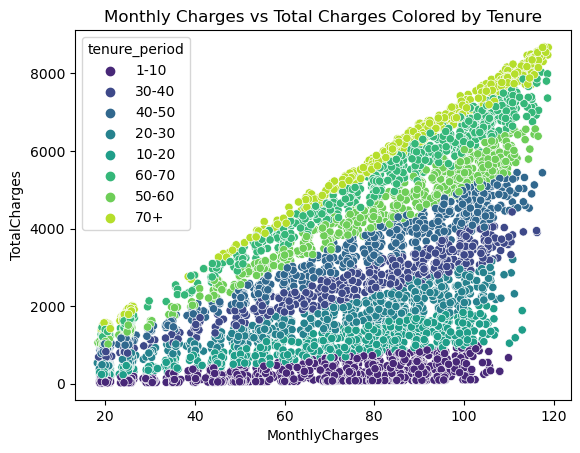

In [42]:
sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges',hue = 'tenure_period', palette='viridis')
plt.title('Monthly Charges vs Total Charges Colored by Tenure')
plt.show()

- There is a clear linear relationship between the three variables i.e. Total charges increases as the monthly charges and tenure increases 

In [43]:
# Using scatter plot to check wheather there is a relationship between montly charges, total charges and Churning of the customers.

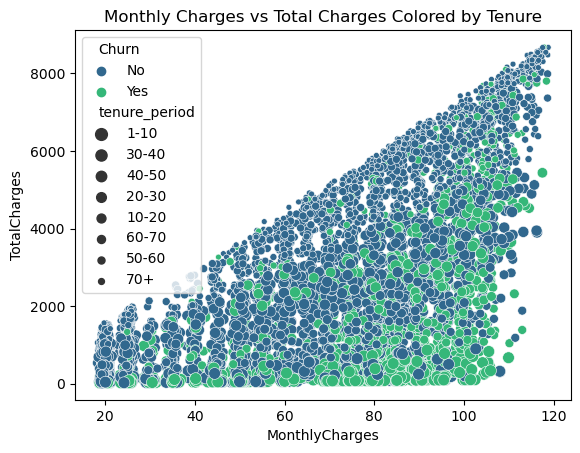

In [44]:
sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges',hue = 'Churn', size = 'tenure_period', palette='viridis')
plt.title('Monthly Charges vs Total Charges Colored by Tenure')
plt.show()

- Churned customers are mostly concentrated in the lower region of TotalCharges, across all levels of MonthlyCharges, suggesting they chrned early, before accumulating high TotalCharges i.e. those having high monthly charges with less total charges will have less tenure and are more likely to churn.
- High MonthlyCharges does not guarantee churn, but when combined with low tenure, churn is more likely. 

In [45]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_period'],
      dtype='object')

In [46]:
# Using scatter plot to check wheather senior citizen have any relationship with montly charges, total charges and Churning.

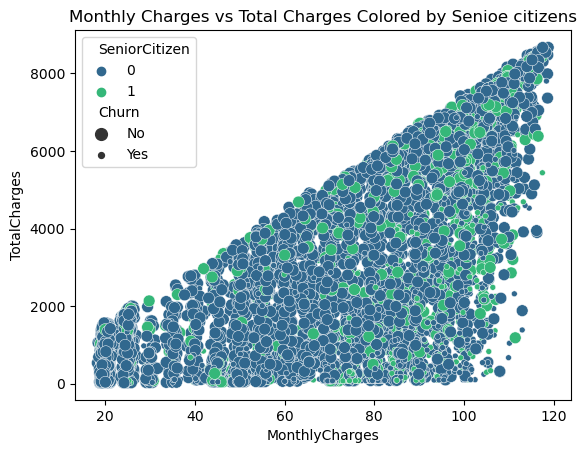

In [47]:
sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges',hue = 'SeniorCitizen',size = 'Churn', palette='viridis')
plt.title('Monthly Charges vs Total Charges Colored by Senioe citizens')
plt.show()

- No Strong Visual Link Between Senior Citizen with monthly charges, total charges and Churn

In [48]:
# Using scatter plot to check wheather there is a relationship of Phone sevices with montly charges, total charges and Churning of the customers.

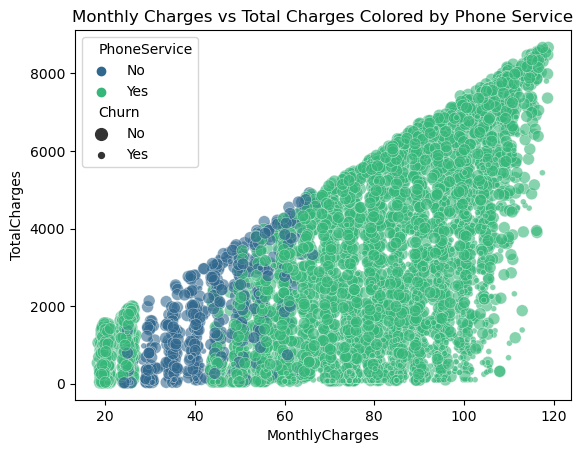

In [49]:
sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges',hue = 'PhoneService',size = 'Churn',alpha=0.6, palette='viridis')
plt.title('Monthly Charges vs Total Charges Colored by Phone Service')
plt.show()

- Customers without PhoneService and low charges are more likely to churn early

In [50]:
# Uisng scatter plot to check the relationship between montly charges, total charges and churning with other variables

In [51]:
list1 = ['InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport',
       'Contract','PaymentMethod']

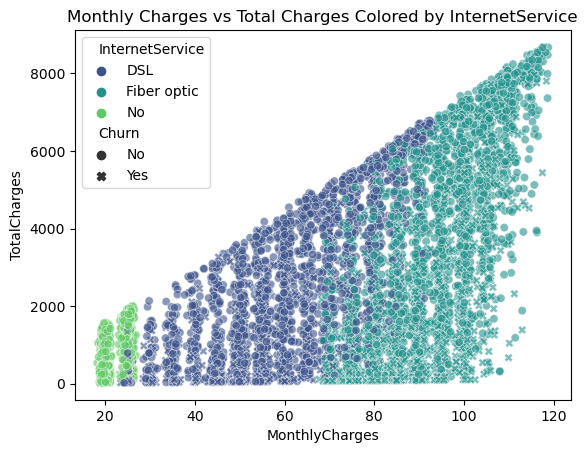

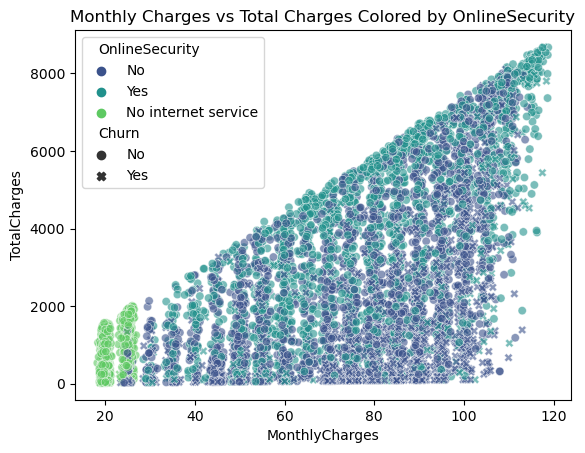

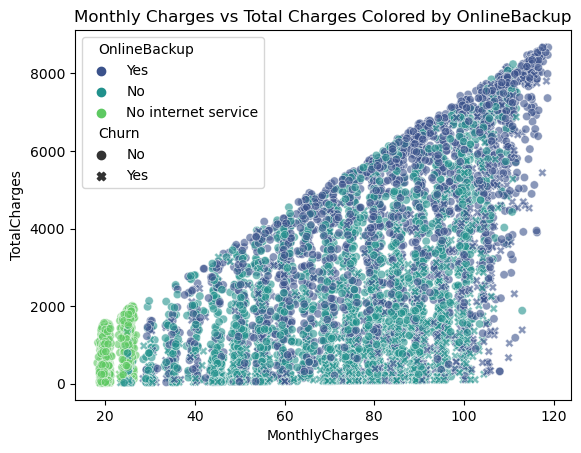

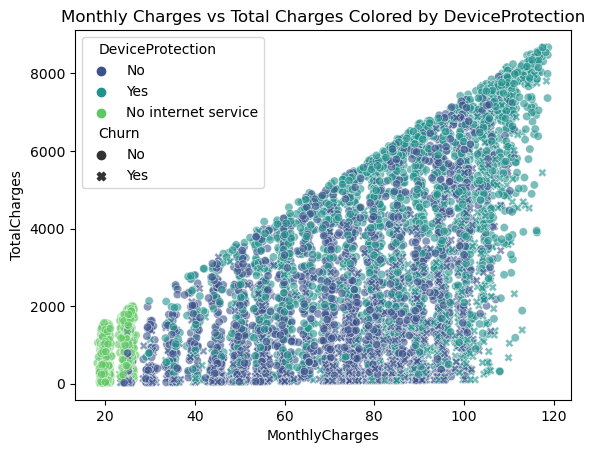

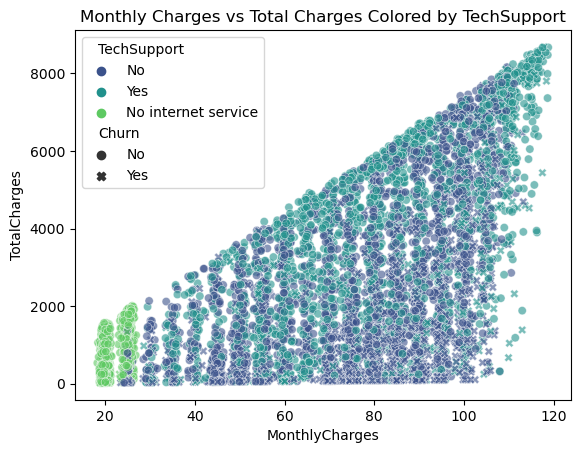

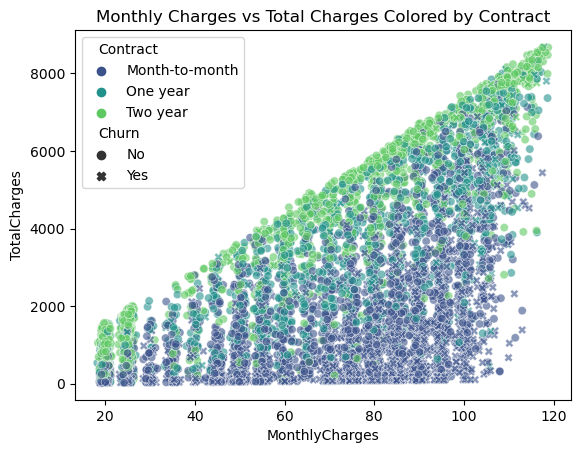

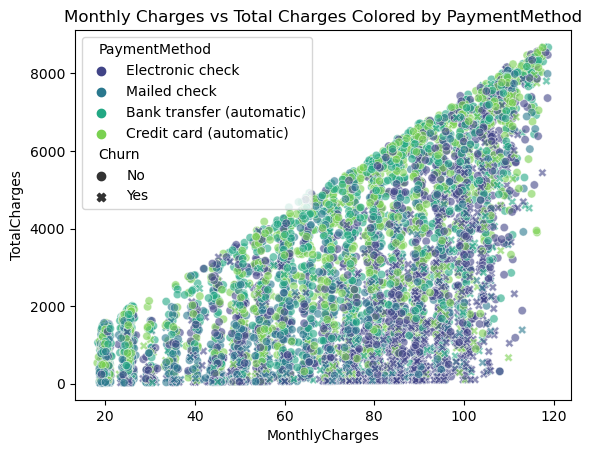

In [52]:
for i in list1:
    sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges',hue = i,style = 'Churn',alpha=0.6, palette='viridis')
    plt.title(f'Monthly Charges vs Total Charges Colored by {i}')
    plt.show()

##### Key points

- Churned customers tend to have low TotalCharges, even when MonthlyCharges are high, indicating early-stage churn.

- This suggests that customers paying higher monthly fees but not staying long (low tenure) are high-risk churners.

### 5. Dropping unneccasiry columns

- After performing Exploratory data analyis it could be drived that columns like 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines','StreamingTV', 'StreamingMovies' and 'PaperlessBilling' have no significant effect on churning of the customer, so fropping them would be safe for further model buliding.

In [53]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_period'],
      dtype='object')

In [54]:
data.drop(columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines','StreamingTV', 'StreamingMovies','PaperlessBilling'], inplace = True)

In [3]:
# saving the cleaned data

In [55]:
data.to_csv('tel_churn.csv')

#### Final takeaways 
Customers who are new (low tenure), pay via electronic check, lack support services (like tech support and security), and are on flexible contracts (month-to-month) are the most likely to churn.

To reduce churn, the company should:

- Encourage long-term contracts through incentives.

- Promote and bundle support services like tech support, device protection, and online security.

- Identify and retain high-paying short-tenure customers early through onboarding and engagement strategies.

- Consider improving fiber optic experience or pricing, as its users show higher churn.

### Model building 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [ ]:
# Loadiing the data

df=pd.read_csv("tel_churn.csv")
df.head()

In [ ]:
# Removing 'Unnamed: 0' as it is irrelevent

df=df.drop('Unnamed: 0',axis=1)

In [ ]:
# Encoding the target column 'Churn'

label_encoder = LabelEncoder()

In [ ]:
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [ ]:
# Performing train - test split
x = df.drop(columns = ['Churn'])
x

In [ ]:
y = df['Churn']
y

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [ ]:
df.columns

In [ ]:
# Applying One hot encoding to categorical variables and retain numerical variables using `make_column_transformer`. This ensures our data is ready for training.

column_trans = make_column_transformer((OneHotEncoder(sparse = False),['PhoneService','InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport','Contract','PaymentMethod', 'tenure_period']),remainder = 'passthrough')

#### Model 1: Logistic regression

We build a logistic regression model using a pipeline that includes preprocessing and fitting. This serves as a baseline model for churn prediction.

In [ ]:
lr = LogisticRegression()

In [ ]:
pipe = make_pipeline(column_trans,lr)

In [ ]:
pipe.fit(X_train, Y_train)

In [ ]:
# prediction 
y_pred_lr = pipe.predict(x_test)

In [ ]:
# evaluation 
print("Accuracy of logistic model:", accuracy_score(y_test, y_pred_lr))
print('*'*50)
print('classification report')
print(classification_report(y_test, y_pred_lr))

The classification report gives insight into model precision, recall, and F1-score. Accuracy alone may not be sufficient due to class imbalance.

#### Model 2: Decision Tree

We train a decision tree classifier with specific parameters to compare its performance with logistic regression.

In [ ]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
pipe2 = make_pipeline(column_trans,model_dt)

In [ ]:
pipe2.fit(X_train, Y_train)

In [ ]:
# prediction 
y_pred_dt = pipe2.predict(x_test)

In [ ]:
# evaluation 
print("Accuracy of decision tree model:", accuracy_score(y_test, y_pred_dt))
print('*'*50)
print('classification report')
print(classification_report(y_test, y_pred_dt))

#### Class Imbalance Check

We check for imbalance in the target variable `Churn`. If one class dominates, this could lead to biased models.

In [ ]:
100*df['Churn'].value_counts()/len(df['Churn'])

As the data is highly imbalanced hence the accuracy score is being affected. 
So we will be using SMOTEN for upsampling.

#### Handling Imbalance with SMOTE

To address the class imbalance, we apply SMOTE (Synthetic Minority Oversampling Technique) to oversample the minority clas.

In [ ]:
X_encoded = column_trans.fit_transform(x)

In [ ]:
# Apply SMOTE for upsampling minority class
sm = SMOTE(random_state=42)

In [ ]:
X_resampled, y_resampled = sm.fit_resample(X_encoded, y)

In [ ]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#### Model 3: Decision Tree with SMOTE

We retrain the decision tree on the resampled dataset and evaluate whether oversampling improves recall for the minority class.

In [ ]:
# Train Decision Tree
model = DecisionTreeClassifier(
    criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8
)

In [ ]:
model.fit(X_train_us, y_train_us)

In [ ]:
# Predict
y_pred_us = model.predict(X_test_us)

In [ ]:
print("Accuracy score of Decision tree after upsampling:", accuracy_score(y_test_us, y_pred_us))
print("\nClassification Report:\n", classification_report(y_test_us, y_pred_us))

The accuracy increased significantly, confirming the effect of class imbalane on the model.
To make it more accurate we can use advance resampling.

#### Model 3: Logistic Regression with SMOTE

We retrain the Logistic Regression on the resampled dataset and evaluate whether oversampling improves recall for the minority class.

In [ ]:
X_encoded = column_trans.fit_transform(x)

In [ ]:
# Apply SMOTE for upsampling minority class
sm = SMOTE(random_state=42)

In [ ]:
X_resampled, y_resampled = sm.fit_resample(X_encoded, y)

In [ ]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
model2 = make_pipeline(LogisticRegression())

In [ ]:
model2.fit(X_train_us, y_train_us)

In [ ]:
# Predict
y_pred_us = model2.predict(X_test_us)

In [ ]:
print("Accuracy score of LR tree after upsampling:", accuracy_score(y_test_us, y_pred_us))
print("\nClassification Report:\n", classification_report(y_test_us, y_pred_us))

#### Advanced Resampling: SMOTEENN

We apply SMOTEENN, which combines SMOTE with Edited Nearest Neighbors, to remove noisy examples while also oversampling. This may improve generalizatio.

In [ ]:
# Apply SMOTEENN
sm = SMOTEENN(random_state=42)

In [ ]:
X_resampled, y_resampled = sm.fit_resample(X_encoded, y)

In [ ]:
# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#### Model 4: Decision Tree with SMOTEENN

We retrain the decision tree on the advanced resampled dataset and evaluate whether oversampling improves recall for the minority class.

In [ ]:
# Train model
model_dt = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_dt.fit(X_train, y_train)

In [ ]:
# Predict and evaluate
y_pred = model_dt.predict(X_test)

In [ ]:
print("Accuracy of decision tree model after upsampling and ENN:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# The performance increased significantly by advanced resampling.

Importing using pickle

In [ ]:
#### Pickle

In [ ]:
import pickle

In [ ]:
filename = 'CCmodel.sav'

In [ ]:
pickle.dump(model_dt, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))